##### Сегментация текста 

In [1]:
from google.colab import files, drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras import utils                        #категориальные данные
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 
from tensorflow.keras.preprocessing.text import Tokenizer # тексты в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # обработка последовательностей
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

In [2]:
# для работы в google colabю нужно подключить диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### функция считывания текста из папки

In [3]:
def readText(fileName): 
  f = open(fileName, 'r') 
  text = f.read()
  text = text.replace("\n", " ")
  return text
className = ['О.Генри', 'Стругацкие', 'Булгаков', 'Саймак', 'Фрай', 'P.Брэдберри']
nClasses = len(className)
print(nClasses)

6


In [4]:
trainText = []   # ОБУЧАЮЩАЯ ВЫБОРКА добавляем тексты массив
trainText.append(readText('/content/drive/MyDrive/Writers/(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/MyDrive/Writers/(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('/content/drive/MyDrive/Writers/(Рэй Брэдберри) Обучающая_22 вместе.txt'))
trainText.append(readText('/content/drive/MyDrive/Writers/(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/MyDrive/Writers/Саймак Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/MyDrive/Writers/(Фрай) Обучающая_5 вместе.txt')) 
testText = []   # ТЕСТОВАЯ ВЫБОРКА добавляем тексты массив
testText.append(readText('/content/drive/MyDrive/Writers/(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/MyDrive/Writers/(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('/content/drive/MyDrive/Writers/(Рэй Брэдберри) Тестовая_8 вместе.txt'))
testText.append(readText('/content/drive/MyDrive/Writers/(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/MyDrive/Writers/Саймак Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/MyDrive/Writers/(Фрай) Тестовая_2 вместе.txt'))

In [5]:
print(trainText[1:2])

["«Лиса-на-рассвете»   Коралио нежился в полуденном зное, как томная красавица в сурово хранимом гареме. Город лежал у самого моря на полоске наносной земли. Он казался брильянтиком, вкрапленным в ярко-зеленую ленту. Позади, как бы даже нависая над ним, вставала — совсем близко — стена Кордильер. Впереди расстилалось море, улыбающийся тюремщик, еще более неподкупный, чем хмурые горы. Волны шелестели вдоль гладкого берега, попугаи кричали в апельсинных деревьях и сейбах, пальмы склоняли свои гибкие кроны, как неуклюжий кордебалет перед самым выходом прима-балерины.  Внезапно город закипел и взволновался. Мальчишка-туземец пробежал по заросшей травою улице, крича во все горло: «Busca el Senor Гудвин! На venido un telegrafo por el!» {Разыщите сеньора Гудвина! Для него получена телеграмма! (исп.)}  Весь город услыхал этот крик. Телеграммы не часто приходят в Коралио. Десятки голосов с готовностью подхватили воззвание мальчишки. Главная улица, параллельная берегу, быстро переполнилась народ

In [6]:
cur_time = time.time()   # фиксируем время
maxWordsCount = 15000    # назначем кол-во слов для обучения
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())
print('Время: ', round(time.time() - cur_time, 2), 'c', sep='')

Время: 3.31c


In [7]:
print(items[-5:])  
print(items[:5])

[('промолчу', 133066), ('яльмар', 133067), ('бесхвостую', 133068), ('внучку', 133069), ('запоздал', 133070)]
[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5)]


In [8]:
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # преобразуем обучающий текст в набор индексов
testWordIndexes = tokenizer.texts_to_sequences(testText)   # преобразуем проверочный текст в набор индексов

print("Оригинальный текст:........", trainText[2][:100])
print("Индексы слов:...", trainWordIndexes[5][80:100], '\n')
print('Test text....:', testText[3][0:45])
print('Index test words...:', testWordIndexes[1][10:25])

Оригинальный текст:........ ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛАГОДАРНОСТЬЮ   Если тебе дадут линованную бумагу, пиши попер
Индексы слов:... [1060, 11, 600, 1, 1, 1, 9370, 1, 1, 187, 71, 4, 1, 2, 20, 1, 1, 1, 74, 2752] 

Test text....: ﻿ОТЕЛЬ «У ПОГИБШЕГО АЛЬПИНИСТА»    ГЛАВА 1   
Index test words...: [1, 1, 1, 1, 4294, 1, 7954, 1, 1, 4043, 1, 1415, 7, 7671, 6214]


In [9]:
print("Статистика по обучающим текстам:")

symbolsTrainText = 0 
wordsTrainText = 0
# Проходим по всем классам
for i in range(nClasses): 
  print(className[i], " "*(10-len(className[i])), len(trainText[i]), 
        "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i])              # Считаем символы
  wordsTrainText += len(trainWordIndexes[i])         # Считаем слова 

print('.......................................')
print("Всего", symbolsTrainText, "символов,", wordsTrainText, "слов \n")
print()
print("Статистика по тестовым текстам:")

# Переменные для подсчета Слов и Символов в тестовых текстах
symbolsTestText = 0 
wordsTestText = 0 
for i in range(nClasses):
  print(className[i], ' '*(10-len(className[i])), len(testText[i]), 
        "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i])
  wordsTestText += len(testWordIndexes[i])
print('.......................................')
print("Всего", symbolsTestText, "символов,", wordsTestText, "слов")

Статистика по обучающим текстам:
О.Генри     1765648 символов,  261465 слов
Стругацкие  1049517 символов,  160607 слов
Булгаков    1386454 символов,  214454 слов
Саймак      2042469 символов,  313012 слов
Фрай        1609507 символов,  251502 слов
P.Брэдберри  3700010 символов,  568533 слов
.......................................
Всего 11553605 символов, 1769573 слов 


Статистика по тестовым текстам:
О.Генри     875042 символов,  132730 слов
Стругацкие  349662 символов,  53238 слов
Булгаков    868673 символов,  132524 слов
Саймак      704846 символов,  108621 слов
Фрай        318811 символов,  50360 слов
P.Брэдберри  1278191 символов,  196731 слов
.......................................
Всего 4395225 символов, 674204 слов


In [10]:
# создаем обучаюшие и проверочные выборки
def getSetFromIndexes(wordIndexes, xLen, step):
  xSamples = []
  wordsLen = len(wordIndexes)
  index =0 
  while (xLen + index <= wordsLen):
    xSamples.append(wordIndexes[index:index+xLen])
    index += step
  return xSamples

In [11]:
def createSetsMultiClasses(wordIndexes, xLen, step): 
# Функция принимает последовательность индексов, размер окна, шаг окна
  nClasse = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))

  xSamples = []
  ySamples = []
  for t in range(nClasse):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasse))
  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples) 
  return (xSamples, ySamples)

In [89]:
xLen= 1500 
step= 200

cur_time = time.time() 
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(8806, 1500)
(8806, 6)
(3330, 1500)
(3330, 6)
Время обработки: 1.43c


In [90]:
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) 
print('Размер Train выборки', xTrain01.shape, 'Test:', xTest01.shape)
print('Часть набора слов в виде Bag of Words', xTrain01[0][0:100])

Размер Train выборки (8806, 10000) Test: (3330, 10000)
Часть набора слов в виде Bag of Words [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0.]


In [14]:
for i in range(100):
  print(int(i in xTrain01[0]),end=' ') 

1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [98]:
model1 = Sequential()
model1.add(Dense(1200, input_dim=maxWordsCount, activation="relu"))
model1.add(Dense(600, activation='relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(nClasses, activation='softmax'))

model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 600)               6000600   
_________________________________________________________________
dense_76 (Dense)             (None, 200)               120200    
_________________________________________________________________
dropout_19 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 200)               800       
_________________________________________________________________
dense_77 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_78 (Dense)             (None, 6)                 606       
Total params: 6,142,306
Trainable params: 6,141,906
Non-trainable params: 400
_________________________________________

In [28]:
def createTestMultiClasses(wordIndexes, xLen, step): 
  nClasses = len(wordIndexes)   #Задаем количество классов
  xTest6Classes01 = []          #Cписок всех классов, каждый: "кол-во окон в тексте * 20000 (при maxWordsCount=20000)"
  xTest6Classes = []            #Cписок массивов, каждый: "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:        
    sample = (getSetFromIndexes(wI, xLen, step))
    xTest6Classes.append(sample)
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample))
  xTest6Classes01 = np.array(xTest6Classes01)
  xTest6Classes = np.array(xTest6Classes)  
  return xTest6Classes01, xTest6Classes  

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  totalSumRec = 0   # Сумма всех правильных ответов
  
  for i in range(nClasses):
    currPred = model.predict(xTest[i])
    currOut = np.argmax(currPred, axis=1)

    evVal = []
    for j in range(nClasses):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))
    totalSumRec += len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal) 
    isRecognized = "НЕПРАВИЛЬНЫЙ ответ!"
    if (recognizedClass == i):
      isRecognized = 'ПРАВИЛЬНЫЙ ответ!'
    str1 = 'Класс: ' + className[i] + " " * (11 - len(className[i])) + str(int(100*evVal[i])) + "% сеть отнесла к классу " + className[recognizedClass]
    print(str1, ' ' * (55-len(str1)), isRecognized, sep='')
  
#Выводим средний процент распознавания по всем классам вместе
  print()
  sumCount = 0
  for i in range(nClasses):
    sumCount += len(xTest[i])
  print('Средний процент распознавания:', int(100*totalSumRec/sumCount), "%", sep='')
  print()  
  return totalSumRec/sumCount

In [99]:
history1 = model1.fit(xTrain01, yTrain, epochs=30,
                      batch_size=800,
                      validation_data=(xTest01, yTest))

Epoch 1/30
12/12 [==============================] - 1s 51ms/step - loss: 0.8934 - accuracy: 0.7001 - val_loss: 0.9731 - val_accuracy: 0.7045
Epoch 2/30
12/12 [==============================] - 0s 34ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.7721 - val_accuracy: 0.7517
Epoch 3/30
12/12 [==============================] - 0s 32ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.4998 - val_accuracy: 0.8486
Epoch 4/30
12/12 [==============================] - 0s 31ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.8742
Epoch 5/30
12/12 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.8898
Epoch 6/30
12/12 [==============================] - 0s 32ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5309 - val_accuracy: 0.8396
Epoch 7/30
12/12 [==============================] - 0s 31ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.5014 - val_accuracy: 0.8511
Epoch 8/30
12

In [33]:
xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step)
pred1 = recognizeMultiClass(model1, xTest6Classes01, "Dense")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


НЕЙРОНКА:  Dense

Класс: О.Генри    91% сеть отнесла к классу О.Генри    ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 100% сеть отнесла к классу СтругацкиеПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   100% сеть отнесла к классу Булгаков  ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     98% сеть отнесла к классу Саймак     ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       99% сеть отнесла к классу Фрай       ПРАВИЛЬНЫЙ ответ!
Класс: P.Брэдберри89% сеть отнесла к классу P.БрэдберриПРАВИЛЬНЫЙ ответ!

Средний процент распознавания:94%



# NeuroEmbedding

In [20]:
model = Sequential()
model.add(Embedding(maxWordsCount, 100, input_length=xLen))
model.add(SpatialDropout1D(0.2))
model.add(Flatten())
model.add(BatchNormalization(axis=-1, momentum=0.98, epsilon=0.01))
model.add(Dense(200, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(nClasses, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3000, 100)         1000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 3000, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 300000)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300000)            1200000   
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60000200  
_________________________________________________________________
dense_5 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                

In [35]:
history2 = model.fit(xTrain, yTrain, 
                    epochs=20,
                    batch_size=400,
                    validation_data=(xTest, yTest))


Epoch 1/20
15/15 [==============================] - 6s 392ms/step - loss: 1.4548e-06 - accuracy: 1.0000 - val_loss: 0.9217 - val_accuracy: 0.7808
Epoch 2/20
15/15 [==============================] - 6s 391ms/step - loss: 2.3816e-06 - accuracy: 1.0000 - val_loss: 0.9207 - val_accuracy: 0.7808
Epoch 3/20
15/15 [==============================] - 6s 389ms/step - loss: 2.2585e-05 - accuracy: 1.0000 - val_loss: 0.9128 - val_accuracy: 0.7845
Epoch 4/20
15/15 [==============================] - 6s 390ms/step - loss: 1.6940e-06 - accuracy: 1.0000 - val_loss: 0.9017 - val_accuracy: 0.7868
Epoch 5/20
15/15 [==============================] - 6s 386ms/step - loss: 1.8667e-06 - accuracy: 1.0000 - val_loss: 0.8913 - val_accuracy: 0.7872
Epoch 6/20
15/15 [==============================] - 6s 385ms/step - loss: 2.1104e-06 - accuracy: 1.0000 - val_loss: 0.8853 - val_accuracy: 0.7868
Epoch 7/20
15/15 [==============================] - 6s 387ms/step - loss: 1.5195e-06 - accuracy: 1.0000 - val_loss: 0.8816 -

In [22]:
_, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(model, xTest6Classes, "Embedding")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


НЕЙРОНКА:  Embedding

Класс: О.Генри    61% сеть отнесла к классу О.Генри    ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 96% сеть отнесла к классу Стругацкие ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   78% сеть отнесла к классу Булгаков   ПРАВИЛЬНЫЙ ответ!
Класс: Саймак     74% сеть отнесла к классу Саймак     ПРАВИЛЬНЫЙ ответ!
Класс: Фрай       72% сеть отнесла к классу Фрай       ПРАВИЛЬНЫЙ ответ!
Класс: P.Брэдберри90% сеть отнесла к классу P.БрэдберриПРАВИЛЬНЫЙ ответ!

Средний процент распознавания:78%



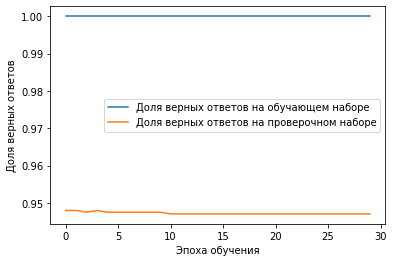

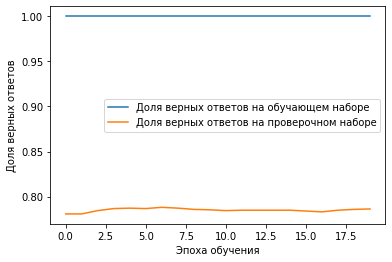

In [39]:
plt.plot(history1.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
plt.plot(history2.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history2.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()